In [25]:
import csv

pokemons = []

# Import DataSet
with open("./pokemon.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    pokemons.append(row)

In [26]:
# Création de deux list (Type Eau & Psy)

type_psy = []
type_eau = []

for pokemon in pokemons:
    if 'Eau' in pokemon:
        type_eau.append(pokemon)
    elif 'Psy' in pokemon:
        type_psy.append(pokemon)

In [27]:
# Création de deux list par Type (PV et Degat)

pv_type_spy = []
degat_type_spy = []

pv_type_eau = []
degat_type_eau = []

for pokemon in type_psy:
    pv_type_spy.append(int(pokemon[1]))
    degat_type_spy.append(int(pokemon[2]))

for pokemon in type_eau:
    pv_type_eau.append(int(pokemon[1]))
    degat_type_eau.append(int(pokemon[2]))

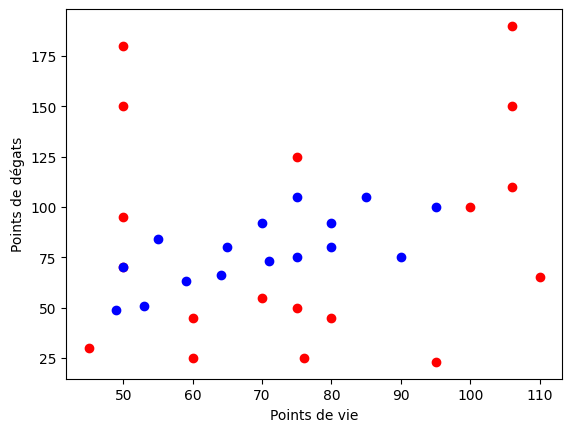

In [28]:
# Affichage du Graphique

import matplotlib.pyplot as plt

plt.plot(pv_type_spy, degat_type_spy, 'ro')
plt.plot(pv_type_eau, degat_type_eau, 'bo')
plt.xlabel('PV')
plt.ylabel('Dégats')
plt.show()

In [29]:
# Fonction calculer distance
from math import *

def calculer_distance(x1, y1, x2, y2):
    """
    Fonction qui prends les axes x & y de deux points et calcul la distance entre eux
    : param x1 (int) : Axe x du premier point
    : param y1 (int) : Axe y du premier point
    : param x2 (int) : Axe x du deuxième point
    : param y2 (int) : Axe y du deuxième point
    : return (int) : Distance entre les deux points
    """
    distance = int(sqrt((x1-x2)**2 + (y1-y2)**2))
    return distance


In [30]:
def type_pokemon(nv_pokemon: list, type_psy: list, type_eau: list, k: int):
    """
    Fonction qui détermine le type du pokemon en fonction de ses PV et dégats
    : param nv_pokemon (list) : Les informations du pokemons (Nom, PV, Degats, Type)
    : param type_psy (list) : Une liste contenant informations de pokemons de type spy
    : param type_eau (list) : Une liste contenant informations de pokemons de type eau
    : param k (int) : Nombres de voisin à selectionner
    : return (list) : Informations du pokemons
    """
    pokemons = type_psy + type_eau
    distances = []

    # Changer les stats du pokemon de STR en INT et les ajouter la distance dans une nouvelle liste
    for pokemon in pokemons:
        pokemon[1] = int(pokemon[1])
        pokemon[2] = int(pokemon[2])
        distances.append(calculer_distance(nv_pokemon[1], nv_pokemon[2], pokemon[1], pokemon[2]))

    # Triage des pokemon en fonction des distances associées
    pokemon_distance = [i for _,i in sorted(zip(distances,pokemons))]
    pokemon_k = []

    # Nombre de pokemon avec ce type
    eau = 0
    psy = 0
    # On compte la fréquence de type sur le nombre k (3, 5, 7 fois)
    for index in range(0, k):
        pokemon_k.append(pokemon_distance[index])
        if pokemon_k[index][3].lower() == 'eau':
            eau += 1
        elif pokemon_k[index][3].lower() == 'psy':
            psy += 1
    
    # On vérifie quel type revient le plus souvent et on l'ajoute au pokemon
    # Print également un message avec le type
    if eau < psy:
        print("Pokemon de type Psy")
        nv_pokemon[3] = "Psy"
    else:
        print("Pokemon de type Eau")
        nv_pokemon[3] = "Eau"
    
    # On retourne les informations du pokemon
    return nv_pokemon


Pokemon de type Eau


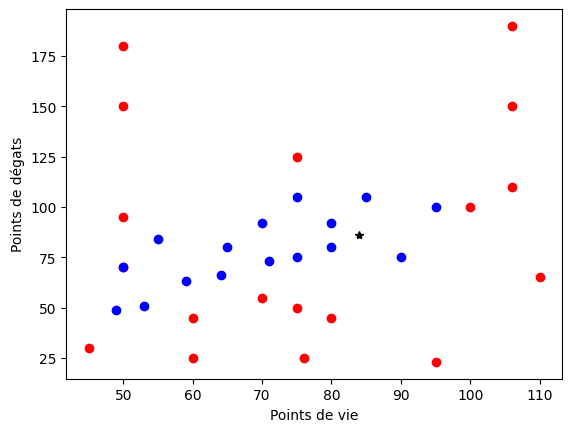

In [31]:
# Notre pokemon : [0] Nom Inconnu donc vide, [1] PV, [2] Degats, [3] Type inconnu donc None
mon_pokemon = ["", 84, 86, None]
# Ici on test avec les stats de Pingoléon

# On test notre algo avec notre pokemon, les listes de pokemon et un nombre k (nb voisin)
resultat = type_pokemon(mon_pokemon, type_psy, type_eau, 3)

# On ajoute notre resultat au graphique
plt.plot(pv_type_spy, degat_type_spy, 'ro')
plt.plot(pv_type_eau, degat_type_eau, 'bo')

# Notre pokemon sera afficher dans le graphique avec une étoile noire
plt.plot(resultat[1], resultat[2], 'k*')
plt.xlabel('PV')
plt.ylabel('Dégats')
plt.show()